In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import os
import os.path
import scipy 
import networkx as nx
#from math import pow
import math
import cmath
from numpy.polynomial.polynomial import polyfit
from scipy import interpolate
from scipy import signal

#Carica librerie python e libreria funzioni.py

%run function.py

In [2]:
p1ori_growth_r1=pd.read_csv(growth_path+'p1ori_r1.csv',index_col=0)
p1ori_growth_r2=pd.read_csv(growth_path+'p1ori_r2.csv',index_col=0)

p5ter_growth_r1=pd.read_csv(growth_path+'p5ter_r1.csv',index_col=0)
p5ter_growth_r2=pd.read_csv(growth_path+'p5ter_r2.csv',index_col=0)

p1longori_growth_r1=pd.read_csv(growth_path+'p1longori_r1.csv',index_col=0)
p1longori_growth_r2=pd.read_csv(growth_path+'p1longori_r2.csv',index_col=0)
p1longori_growth_r3=pd.read_csv(growth_path+'p1longori_r3.csv',index_col=0)

p1longori_growth_u=pd.concat([p1longori_growth_r1,p1longori_growth_r2,p1longori_growth_r3],ignore_index= True)
p1ori_gorwth_u=pd.concat([p1ori_growth_r1,p1ori_growth_r2],ignore_index= True)
p5ter_growth_u=pd.concat([p5ter_growth_r1,p5ter_growth_r2], ignore_index=True)

In [3]:
p1longori_bin_mean=pd.read_csv(growth_path+'p1longori_bin_mean.csv',index_col=0)
p1ori_bin_mean=pd.read_csv(growth_path+'p1ori_bin_mean.csv',index_col=0)
bin_mean_new=pd.read_csv(growth_path+'bin_mean_new.csv',index_col=0)
bin_mean_new

,time,growth_rate_p5ter,growth_rate_p1longori,phi_r,sigma,chi_r
0,-300.000000,0.013125,0.018792,0.110166,0.119141,0.123259
1,-295.977011,0.013037,0.018781,0.110858,0.117605,0.123061
2,-291.954023,0.013019,0.018828,0.111446,0.116823,0.120400
3,-287.931034,0.012999,0.018803,0.111795,0.116273,0.120324
4,-283.908046,0.012988,0.018668,0.112338,0.115616,0.121119
...,...,...,...,...,...,...
170,383.908046,0.019524,0.020991,0.158334,0.123312,0.160729
171,387.931034,0.019510,0.021135,0.158369,0.123190,0.159591
172,391.954023,0.019484,0.021234,0.158525,0.122906,0.159388
173,395.977011,0.019457,0.021389,0.158504,0.122753,0.159069


In [4]:
growth_mean_p5ter_u=bin_mean(p5ter_growth_u.tTrans,(p5ter_growth_u.der/p5ter_growth_u.V)
                 ,4,20,-300,400,interval='custom')

# MINIMAL MODEL CON PHI_R->P1LONGORI E LAMBDA->P5TER

In [5]:
#equazioni: (non serve)
def growth_r_teorico (sigma, phi):
    return sigma*phi

#funzione per fit
def fit_phi (t, chi):
    ind=k
    y0=phifit[ind][0]
    
    def phi_r_teorico (phi, t , chi ):
        #sigma=0.0445
        dphi = np.array(sigma*phi)*(chi-phi)
        return dphi
    phi=scipy.integrate.odeint(phi_r_teorico, y0 , t , args=(chi,)).T[0]
    return phi

def phi_r_teorico (phi, t , chi ):
    #sigma=0.0445
    dphi = np.array(sigma*phi)*(chi-phi)
    return dphi



In [6]:
# divido il dataset nelle 4 fasce temporali da considerare per i fit

bin_mean_used=bin_mean_new[bin_mean_new.time>-100]
tgraph=np.array(bin_mean_used.time)

tfit, phifit, sigmafit=([0]*4,[0]*4, [0]*4)

tfit[0]=np.array(bin_mean_used[bin_mean_used['time'] <17 ].time)
phifit[0]=np.array(bin_mean_used[bin_mean_used['time'] <17 ].phi_r)
sigmafit[0]=0.108

tfit[1]=np.append(tfit[0][-1],np.array(bin_mean_used[(bin_mean_used['time']>=12) & (bin_mean_used['time'] <=45) ].time))
phifit[1]=np.append(phifit[0][-1],np.array(bin_mean_used[(bin_mean_used['time']>=12) & (bin_mean_used['time'] <=45) ].phi_r))
sigmafit[1]=0.126

tfit[2]=np.append(tfit[1][-1],np.array(bin_mean_used[(bin_mean_used['time']>=40) & (bin_mean_used['time'] <=131) ].time))
phifit[2]=np.append(phifit[1][-1],np.array(bin_mean_used[(bin_mean_used['time']>=40) & (bin_mean_used['time'] <=131) ].phi_r))
sigmafit[2]=0.121

tfit[3]=np.append(tfit[2][-1],np.array(bin_mean_used[(bin_mean_used['time']>=130) ].time))
phifit[3]=np.append(phifit[2][-1],np.array(bin_mean_used[(bin_mean_used['time']>=130) ].phi_r))
sigmafit[3]=0.121


In [7]:
tfit[3]

array([130.45977011, 130.45977011, 134.48275862, 138.50574713,
       142.52873563, 146.55172414, 150.57471264, 154.59770115,
       158.62068966, 162.64367816, 166.66666667, 170.68965517,
       174.71264368, 178.73563218, 182.75862069, 186.7816092 ,
       190.8045977 , 194.82758621, 198.85057471, 202.87356322,
       206.89655172, 210.91954023, 214.94252874, 218.96551724,
       222.98850575, 227.01149425, 231.03448276, 235.05747126,
       239.08045977, 243.10344828, 247.12643678, 251.14942529,
       255.17241379, 259.1954023 , 263.2183908 , 267.24137931,
       271.26436782, 275.28735632, 279.31034483, 283.33333333,
       287.35632184, 291.37931034, 295.40229885, 299.42528736,
       303.44827586, 307.47126437, 311.49425287, 315.51724138,
       319.54022989, 323.56321839, 327.5862069 , 331.6091954 ,
       335.63218391, 339.65517241, 343.67816092, 347.70114943,
       351.72413793, 355.74712644, 359.77011494, 363.79310345,
       367.81609195, 371.83908046, 375.86206897, 379.88

In [8]:
p_fit,p_cov=([0]*4,[0]*4)

for k in range(4):
    sigma=sigmafit[k]
    p_fit[k],p_cov[k]=scipy.optimize.curve_fit( fit_phi , tfit[k] , phifit[k])

p_fit[3]=0.162
p_fit[2]=0.179
#p_fit[1]=0.23

In [9]:
chiteo, phiteo, sigmateo=([0]*4,[0]*4, [0]*4)

phiteo[0]=scipy.integrate.odeint(phi_r_teorico, phifit[0][-1:], tfit[0] , args=(p_fit[0],)).T[0]
for j in range(1,4):
    phiteo[j]=scipy.integrate.odeint(phi_r_teorico, phiteo[j-1][-1:], tfit[j] , args=(p_fit[j],)).T[0]

sigmateo[0]=np.full(len(tfit[0]), sigmafit[0])
for j in range(1,4):
    sigmateo[j]=np.append(sigmafit[j-1],np.full(len(tfit[j])-1, sigmafit[j]))

chiteo[0]=np.full(len(tfit[0]), p_fit[0]) 
for j in range(1,4):
    chiteo[j]=np.append(p_fit[j-1],np.full(len(tfit[j])-1, p_fit[j]))   

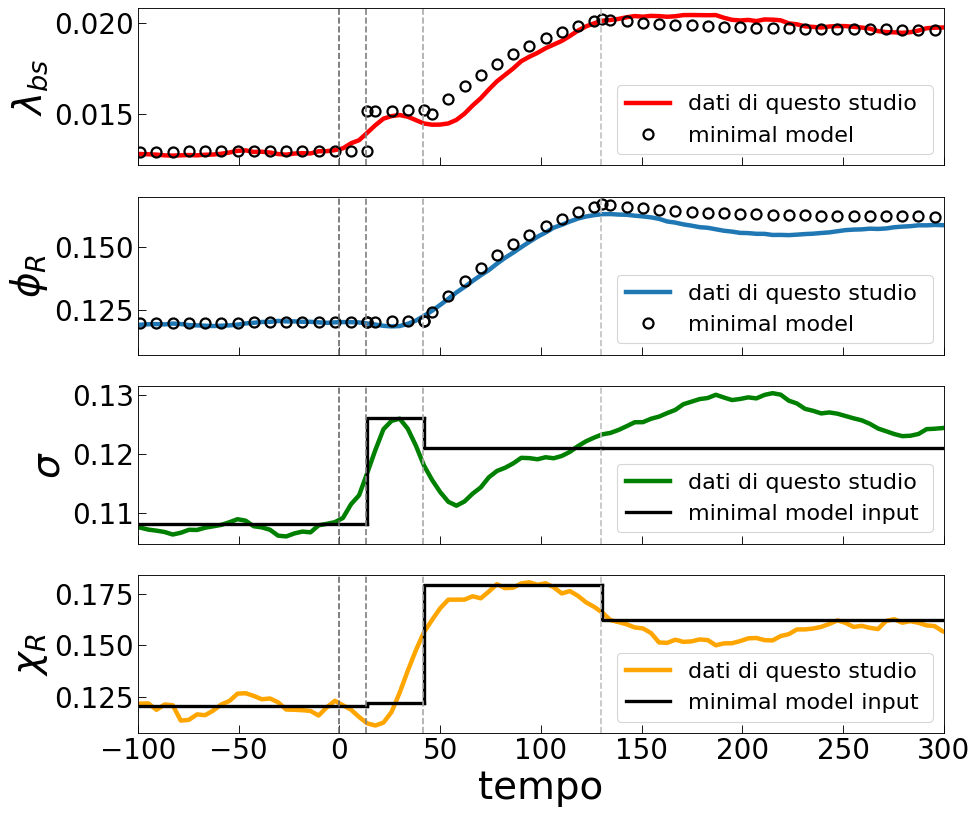

In [10]:
fig=plt.figure(num=None, figsize=(13, 12), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3= fig.add_subplot(4,1,3)
ax4= fig.add_subplot(4,1,4)

#ax1.set_xlabel("tempo", fontsize=15)
ax1.set_ylabel('$\lambda_{bs}$', fontsize=35)

#ax2.set_xlabel("tempo", fontsize=15)
ax2.set_ylabel('$\phi_R$', fontsize=35)

#ax3.set_xlabel("tempo", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=35)

ax4.set_xlabel("tempo", fontsize=35)
ax4.set_ylabel('$\chi_R$', fontsize=35)

ax1.set_xlim(-100,300)
#ax1.set_ylim(0.014,0.028)

ax2.set_xlim(-100,300)
ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)

ax1.axes.xaxis.set_ticklabels([])
ax2.axes.xaxis.set_ticklabels([])
ax3.axes.xaxis.set_ticklabels([])


ax1.tick_params(which='major', length=7, labelsize=25,direction='in')
ax2.tick_params(which='major', length=7, labelsize=25,direction='in')
ax3.tick_params(which='major', length=7, labelsize=25,direction='in')
ax4.tick_params(which='major', length=7, labelsize=25,direction='in')


ax1.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.growth_rate_p5ter, '-',color='red',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax1.plot(tfit[0][0::2],phiteo[0][0::2] * sigmafit[0], marker='o', color='black',fillstyle='none',markeredgewidth=2,markersize=9, linewidth=0, label= 'minimal model')
ax1.plot(tfit[1][0::2],phiteo[1][0::2] * sigmafit[1], marker='o', color='black',fillstyle='none',markeredgewidth=2,markersize=9, linewidth=0)
ax1.plot(tfit[2][2::2],phiteo[2][2::2] * sigmafit[2], marker='o', color='black',fillstyle='none',markeredgewidth=2,markersize=9, linewidth=0)
ax1.plot(tfit[3][0::2],phiteo[3][0::2] * sigmafit[3], marker='o', color='black',fillstyle='none',markeredgewidth=2,markersize=9, linewidth=0)

ax2.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.phi_r, '-', color='tab:blue',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax2.plot(tfit[0][0::2],phiteo[0][0::2], 'o',fillstyle='none',color='black',markeredgewidth=2,markersize=9, linewidth=0.7, label= 'minimal model')
ax2.plot(tfit[1][0::2],phiteo[1][0::2], 'o',fillstyle='none',color='black',markeredgewidth=2,markersize=9, linewidth=0.7)
ax2.plot(tfit[2][0::2],phiteo[2][0::2], 'o',fillstyle='none',color='black',markeredgewidth=2,markersize=9, linewidth=0.7)
ax2.plot(tfit[3][0::2],phiteo[3][0::2], 'o',fillstyle='none',color='black',markeredgewidth=2,markersize=9, linewidth=0.7)

ax3.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.sigma, 'g-',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax3.plot(tfit[0],sigmateo[0], '-',color='black',markersize=4, linewidth=3, label= 'minimal model input')
ax3.plot(tfit[1],sigmateo[1], '-',color='black',markersize=4, linewidth=3)
ax3.plot(tfit[2],sigmateo[2], '-',color='black',markersize=4, linewidth=3)
ax3.plot(tfit[3],sigmateo[3], '-',color='black',markersize=4, linewidth=3)


ax4.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.chi_r, '-',color='orange',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax4.plot(tfit[0],chiteo[0], '-',color='black',markersize=4, linewidth=3, label= 'minimal model input')
ax4.plot(tfit[1],chiteo[1], '-',color='black',markersize=4, linewidth=3)
ax4.plot(tfit[2],chiteo[2], '-',color='black',markersize=4, linewidth=3)
ax4.plot(tfit[3],chiteo[3], '-',color='black',markersize=4, linewidth=3)
#ax4.plot(tgraph,chigraph, 'r-',markersize=4, linewidth=1.5)



#ax4.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.chi_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified dati di questo studio')


ax1.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)

for ax in fig.axes:
    ax.axvline(x=0, linestyle='--', color='dimgrey')
    ax.axvline(x=13, linestyle='--', color='grey')
    ax.axvline(x=41.5, linestyle='--', color='darkgrey')
    ax.axvline(x=130, linestyle='--', color='silver')

#ax3.axvline(x=15, linestyle='-', color='black')
   # ax.axvline(x=50, linestyle='-', color='black')
    #ax.axvline(x=130, linestyle='-', color='black')

plt.savefig('/home/valerio/tesi/data_managment/newmodel.pdf')


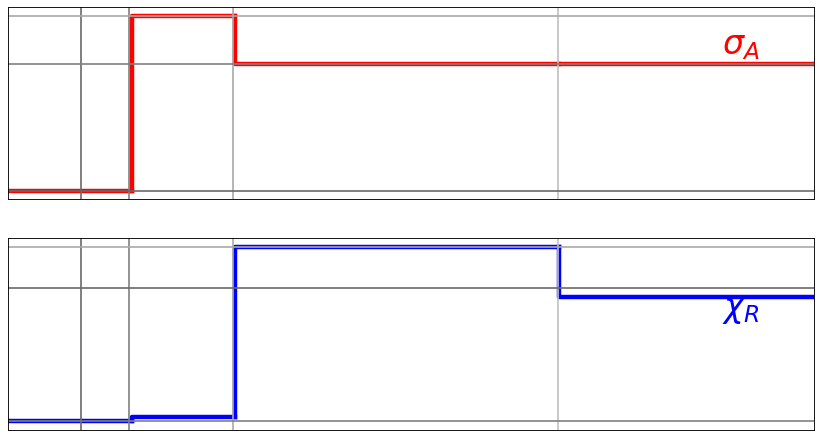

In [11]:
fig=plt.figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(2,1,1)
ax2= fig.add_subplot(2,1,2)

#ax1.set_xlabel("time", fontsize=15)
#ax1.set_ylabel('$\sigma$', fontsize=15)

#ax2.set_xlabel("Tempo", fontsize=20)
#ax2.set_ylabel('$\chi_R$', fontsize=20)

ax1.set_xlim(-20,200)
ax2.set_xlim(-20,200)

#ax1.set_title('Valori di')

ax1.tick_params(which='major', length=0, labelsize=12.5)
ax2.tick_params(which='major', length=0, labelsize=12.5)

ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2.set_yticklabels([])
ax2.set_xticklabels([])



#ax1.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.sigma, 'g-',markersize=4, linewidth=2, label= 'unified p1ori')
ax1.plot(tfit[0],sigmateo[0], 'r-',markersize=4, linewidth=4, label= 'minimal model input')
ax1.plot(tfit[1],sigmateo[1], 'r-',markersize=4, linewidth=4)
ax1.plot(tfit[2],sigmateo[2], 'r-',markersize=4, linewidth=4)
ax1.plot(tfit[3],sigmateo[3], 'r-',markersize=4, linewidth=4)


#ax2.plot(np.linspace(-300,400,len(p1ori_mean_df)),p1ori_mean_df.chi_r, '-',color='black',markersize=4, linewidth=2, label= 'unified p1ori')
ax2.plot(tfit[0],chiteo[0], 'b-',markersize=4, linewidth=4, label= 'minimal model input')
ax2.plot(tfit[1],chiteo[1], 'b-',markersize=4, linewidth=4)
ax2.plot(tfit[2],chiteo[2], 'b-',markersize=4, linewidth=4)
ax2.plot(tfit[3],chiteo[3], 'b-',markersize=4, linewidth=4)
#ax2.plot(tgraph,chigraph, 'r-',markersize=4, linewidth=1.5)

ax1.text(180, 0.123, '$\sigma_A$',horizontalalignment='center',verticalalignment='center',fontsize=30, color='red')
ax2.text(180, 0.158, '$\chi_R$',horizontalalignment='center',verticalalignment='center',fontsize=30, color='blue')



for ax in fig.axes:
    ax.axvline(x=0, linestyle='-', color='dimgrey')
    ax.axvline(x=13, linestyle='-', color='grey')
    ax.axvline(x=41.5, linestyle='-', color='darkgrey')
    ax.axvline(x=130, linestyle='-', color='silver')
    

ax1.axhline(y=0.108, linestyle='-', color='dimgrey', label='$\sigma^*_i$')
ax1.axhline(y=0.121, linestyle='-', color='grey',label='$\sigma^*_{max}$')
ax1.axhline(y=0.126 ,linestyle='-', color='darkgrey',label='$\sigma^*_f$')

ax2.axhline(y=0.165, linestyle='-', color='dimgrey')
ax2.axhline(y=0.1204, linestyle='-', color='grey')
ax2.axhline(y=0.179 ,linestyle='-', color='darkgrey')


#ax1.axvline(x=15, linestyle='-', color='red')
   # ax.axvline(x=50, linestyle='-', color='red')
    #ax.axvline(x=130, linestyle='-', color='red')
plt.savefig('/home/valerio/tesi/data_managment/scaletemporali.pdf')

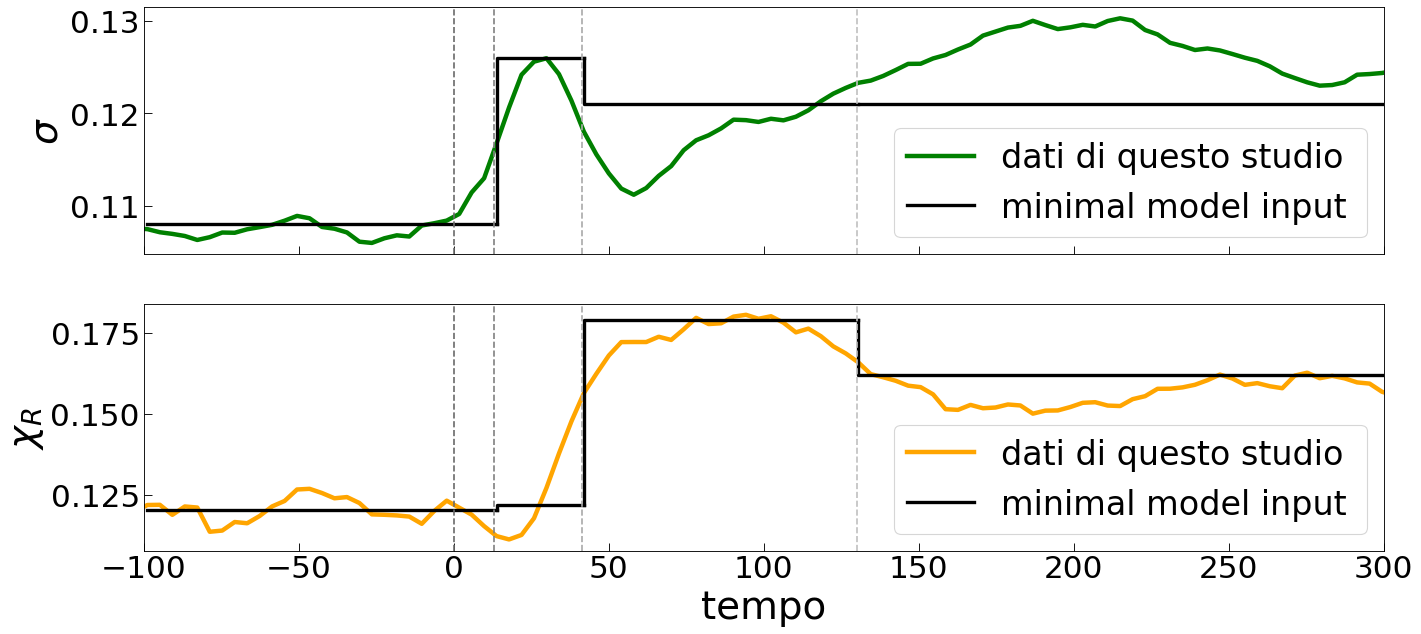

In [12]:
fig=plt.figure(num=None, figsize=(20, 9), dpi=80, facecolor='w', edgecolor='k')


ax3= fig.add_subplot(2,1,1)
ax4= fig.add_subplot(2,1,2)

#ax1.set_xlabel("tempo", fontsize=15)
#ax3.set_xlabel("tempo", fontsize=15)
ax3.set_ylabel('$\sigma$', fontsize=35)

ax4.set_xlabel("tempo", fontsize=35)
ax4.set_ylabel('$\chi_R$', fontsize=35)


ax3.set_xlim(-100,300)
ax4.set_xlim(-100,300)

ax3.axes.xaxis.set_ticklabels([])



ax3.tick_params(which='major', length=7, labelsize=28,direction='in')
ax4.tick_params(which='major', length=7, labelsize=28,direction='in')



ax3.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.sigma, 'g-',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax3.plot(tfit[0],sigmateo[0], '-',color='black',markersize=4, linewidth=3, label= 'minimal model input')
ax3.plot(tfit[1],sigmateo[1], '-',color='black',markersize=4, linewidth=3)
ax3.plot(tfit[2],sigmateo[2], '-',color='black',markersize=4, linewidth=3)
ax3.plot(tfit[3],sigmateo[3], '-',color='black',markersize=4, linewidth=3)


ax4.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.chi_r, '-',color='orange',markersize=4, linewidth=4, label= 'dati di questo studio ')
ax4.plot(tfit[0],chiteo[0], '-',color='black',markersize=4, linewidth=3, label= 'minimal model input')
ax4.plot(tfit[1],chiteo[1], '-',color='black',markersize=4, linewidth=3)
ax4.plot(tfit[2],chiteo[2], '-',color='black',markersize=4, linewidth=3)
ax4.plot(tfit[3],chiteo[3], '-',color='black',markersize=4, linewidth=3)
#ax4.plot(tgraph,chigraph, 'r-',markersize=4, linewidth=1.5)



#ax4.plot(np.linspace(-300,400,len(bin_mean_new)),bin_mean_new.chi_r, 'o-',color='orange',markersize=4, linewidth=0.7, label= 'unified dati di questo studio')



ax3.legend(fontsize=30)
ax4.legend(fontsize=30)

for ax in fig.axes:
    ax.axvline(x=0, linestyle='--', color='dimgrey')
    ax.axvline(x=13, linestyle='--', color='grey')
    ax.axvline(x=41.5, linestyle='--', color='darkgrey')
    ax.axvline(x=130, linestyle='--', color='silver')

#ax3.axvline(x=15, linestyle='-', color='black')
   # ax.axvline(x=50, linestyle='-', color='black')
    #ax.axvline(x=130, linestyle='-', color='black')

plt.savefig('/home/valerio/tesi/data_managment/scaletemporali2.pdf')

# MODELLO MECCANICISTICO


In [13]:
bin_mean_new

,time,growth_rate_p5ter,growth_rate_p1longori,phi_r,sigma,chi_r
0,-300.000000,0.013125,0.018792,0.110166,0.119141,0.123259
1,-295.977011,0.013037,0.018781,0.110858,0.117605,0.123061
2,-291.954023,0.013019,0.018828,0.111446,0.116823,0.120400
3,-287.931034,0.012999,0.018803,0.111795,0.116273,0.120324
4,-283.908046,0.012988,0.018668,0.112338,0.115616,0.121119
...,...,...,...,...,...,...
170,383.908046,0.019524,0.020991,0.158334,0.123312,0.160729
171,387.931034,0.019510,0.021135,0.158369,0.123190,0.159591
172,391.954023,0.019484,0.021234,0.158525,0.122906,0.159388
173,395.977011,0.019457,0.021389,0.158504,0.122753,0.159069


In [14]:
bin_mean_new.chi_r

0      0.123259
1      0.123061
2      0.120400
3      0.120324
4      0.121119
         ...   
170    0.160729
171    0.159591
172    0.159388
173    0.159069
174    0.160013
Name: chi_r, Length: 175, dtype: float64

In [15]:
steady_p1longori_df=pd.DataFrame({'phi_r':[np.array(bin_mean_new.phi_r[10:74]).mean(),np.array(bin_mean_new.phi_r[110:174]).mean()],
                                  'growth':[np.array(bin_mean_new.growth_rate_p5ter[10:74]).mean(),np.array(bin_mean_new.growth_rate_p5ter[110:174]).mean()],
                                  'sigma':[np.array(bin_mean_new.sigma[10:74]).mean(),np.array(bin_mean_new.sigma[110:174]).mean()],
                                  'chi':[np.array(bin_mean_new.chi_r[10:74]).mean(),np.array(bin_mean_new.chi_r[110:174]).mean()]})


In [16]:
#steady_p1ori_df=pd.DataFrame({'phi_r':[np.array(p1ori_bin_mean.p1o_p5t_phi_r[10:74]).mean(),np.array(p1ori_bin_mean.p1o_p5t_phi_r[110:174]).mean()],
#                                  'growth':[np.array(growth_mean_p5ter_u[10:74]).mean(),np.array(growth_mean_p5ter_u[110:174]).mean()],
#                                  'sigma':[np.array(p1ori_bin_mean.sigma2_p1o_p5t[10:74]).mean(),np.array(p1ori_bin_mean.sigma2_p1o_p5t[110:174]).mean()],
#                                  'chi':[np.array(p1ori_bin_mean.chi2_r[10:74]).mean(),np.array(p1ori_bin_mean.chi2_r[110:174]).mean()]})
#NON SERVE ED É SBAGLIATO

In [17]:
itp = interpolate.interp1d(p1longori_bin_mean.time,p1longori_bin_mean.chi2_r, kind='linear')
yy_sg = scipy.signal.savgol_filter(itp(p1longori_bin_mean.time), 17, 3)

In [18]:
t_sm=np.append(p1longori_bin_mean.time[75:88],p1longori_bin_mean.time[103:115])
y_sm=np.append(yy_sg[75:88],yy_sg[103:115])
sm_chi=scipy.interpolate.interp1d(t_sm, y_sm, kind='cubic') 

y_sm=np.copy(yy_sg)
y_sm[75:115]=sm_chi(p1longori_bin_mean.time[75:115])

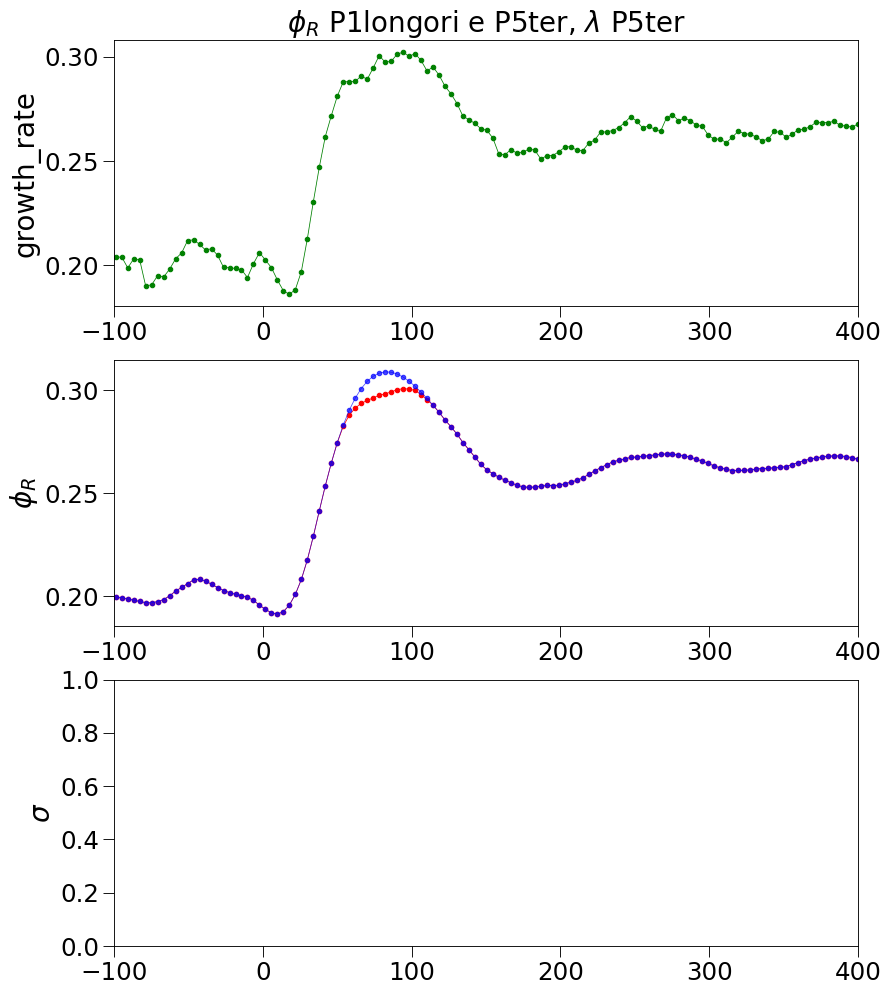

In [19]:
fig=plt.figure(num=None, figsize=(12, 15), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3= fig.add_subplot(3,1,3)

ax1.set_title('$\phi_R$ P1longori e P5ter, $\lambda$ P5ter', fontsize=25)

ax1.set_ylabel('growth_rate', fontsize=25)
ax2.set_ylabel('$\phi_R$', fontsize=25)
ax3.set_ylabel('$\sigma$', fontsize=25)

ax1.set_xlim(-100,400)
ax2.set_xlim(-100,400)
ax3.set_xlim(-100,400)

ax1.tick_params(which='major', length=10, labelsize=22)
ax2.tick_params(which='major', length=10, labelsize=22)
ax3.tick_params(which='major', length=10, labelsize=22)

ax2.plot(np.linspace(-300,400,len(p1longori_bin_mean)), yy_sg, 'ro-',markersize=4, linewidth=0.7, label= 'unified P1longori')
#ax2.plot(p1longori_bin_mean.time[75:115], sm_chi(p1longori_bin_mean.time[75:115]), 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori', alpha=0.3)
ax2.plot(np.linspace(-300,400,len(p1longori_bin_mean)), y_sm, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori', alpha=0.7)


ax1.plot(np.linspace(-300,400,len(p1longori_bin_mean)), p1longori_bin_mean.chi2_r, 'go-',markersize=4, linewidth=0.7, label= 'unified P1longori')

#ax2.plot(np.linspace(-300,400,len(p1longori_bin_mean)),d_chi_r, 'bo-',markersize=4, linewidth=0.7, label= 'unified P1longori')
#ax3.plot(np.linspace(-300,400,len(p1longori_bin_mean)),d2_chi_r, 'go-',markersize=4, linewidth=0.7, label= 'unified P1longori')


#ax1.legend(fontsize=20)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)


# NEW MODEL IMPLEMENTATION

In [20]:
x=((y_sm)-steady_p1longori_df.phi_r[1])[75:]
x1=((yy_sg)-steady_p1longori_df.phi_r[1])[75:]

In [21]:
t_fit=np.array(p1longori_bin_mean.time[75:])
d_chi_r=derivata_sg(t_fit, x,11)
d2_chi_r=derivata_sg(t_fit, d_chi_r,11)



In [22]:
def chi_fit_new (x_data,a,b):
    d_fit=np.array(derivata_sg(t_fit, x_data,11))
    d2_fit=np.array(derivata_sg(t_fit, d_fit,11))
    return a*b*d2_fit+(a+b)*d_fit

In [23]:
popt,pcov= scipy.optimize.curve_fit(chi_fit_new,t_fit,-x, p0=[100,1])
#IL FIT NON FUNZIONA

/home/valerio/.local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [24]:
#FACCIO A MANO
prova=chi_fit_new (x,15,10)
chi_r_mecc=-prova+steady_p1longori_df.phi_r[1]

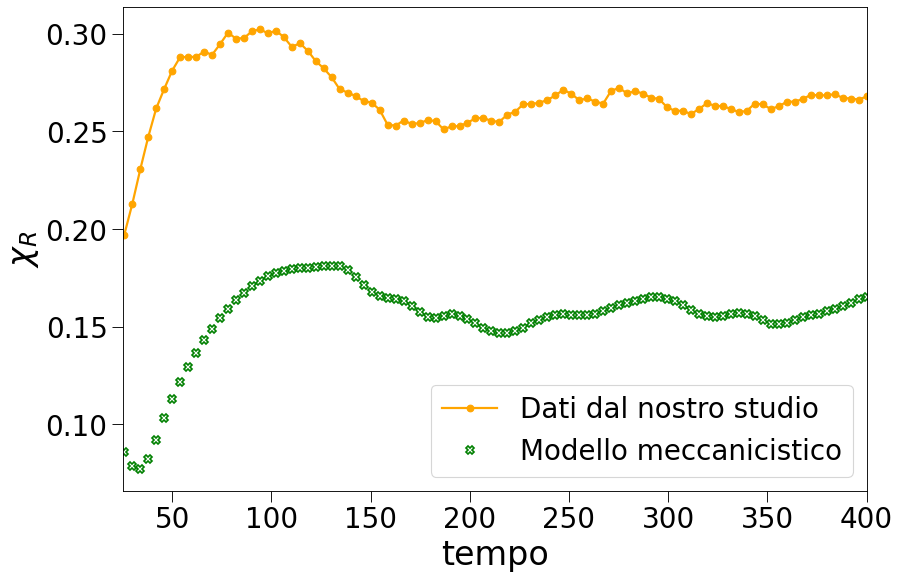

In [25]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('$\chi_R$', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(25,400)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
ax1.plot(np.linspace(-300,400,len(p1longori_bin_mean)), p1longori_bin_mean.chi2_r, 'o-',color='orange',markersize=6, linewidth=2, label= 'Dati dal nostro studio')
ax1.plot(t_fit, chi_r_mecc, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')




ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)
plt.savefig('/home/valerio/tesi/data_managment/mecc_new_model.pdf')

In [26]:
dphi_r=derivata_sg(bin_mean_new.time,bin_mean_new.phi_r)


In [27]:
sigma_mecc=(1/(bin_mean_new[bin_mean_new.time>0].phi_r*(chi_r_mecc-
                                             bin_mean_new[bin_mean_new.time>0].phi_r)))*dphi_r[-100:]


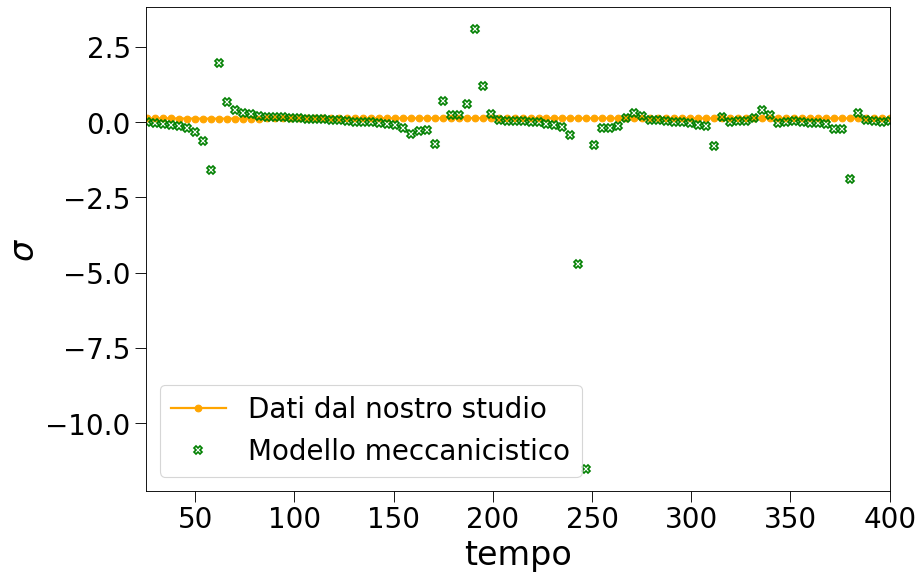

In [28]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('$\sigma$', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(25,400)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
ax1.plot(np.linspace(-300,400,len(p1longori_bin_mean)), bin_mean_new.sigma, 'o-',color='orange',markersize=6, linewidth=2, label= 'Dati dal nostro studio')
ax1.plot(t_fit, sigma_mecc, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')




ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [29]:
steady_p1longori_df

,phi_r,growth,sigma,chi
0,0.118402,0.012784,0.107982,0.120046
1,0.157726,0.019844,0.125827,0.156911


In [32]:
#growth_prova[growth_prova.time>139]
growth_prova[35:]=steady_p1longori_df.growth[1]
growth_prova

array([0.01311597, 0.01339239, 0.0135651 , 0.01397058, 0.01438439,
       0.01474401, 0.01488412, 0.01494433, 0.01485106, 0.0146633 ,
       0.01447769, 0.0144125 , 0.0144186 , 0.01448095, 0.01467676,
       0.01501857, 0.01546534, 0.01586584, 0.01634645, 0.01679443,
       0.01714896, 0.01749885, 0.01790008, 0.01814513, 0.01835592,
       0.01861086, 0.01881466, 0.01901276, 0.01928403, 0.01957998,
       0.01981323, 0.01997997, 0.02011879, 0.02016204, 0.02022027,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984439,
       0.01984439, 0.01984439, 0.01984439, 0.01984439, 0.01984

In [31]:
growth_prova=np.array(bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter)
#growth_prova[growth_prova.time>139].growth_rate_p5ter=steady_p1longori_df.growth[1]

# NEW FLUX MODEL

In [33]:
#definisco J0, flusso di amminoacidi 'liberi' 
J0=steady_p1longori_df.growth[1]-(((0.55-steady_p1longori_df.phi_r[1])/(0.55-steady_p1longori_df.phi_r[0]))*steady_p1longori_df.growth[0])
t_post=bin_mean_new[bin_mean_new.time>0].time

In [34]:
dAdt=(steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0]))*(
   0.55-bin_mean_new[bin_mean_new.time>0].phi_r)+J0-bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter
#Adt=(steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0]))*(
#   0.55-bin_mean_new[bin_mean_new.time>0].phi_r)+J0-growth_prova
#np.array(dAdt)
#dA=(steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0]))*(
#    0.55-bin_mean_new[bin_mean_new.time>0].phi_r)+J0


In [35]:
k=steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0])

In [36]:
steady_p1longori_df.growth[0]*(0.55-steady_p1longori_df.phi_r[1])/(0.55-steady_p1longori_df.phi_r[0])-steady_p1longori_df.growth[1]

-0.008225204008367558

In [37]:
delta_t=bin_mean_new.time[1]-bin_mean_new.time[0] #def intervallo temporale di integrazione
A0=steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0])
A=discrete_int(np.array(dAdt),delta_t,A0)
A

array([0.02962009, 0.06004966, 0.08979758, 0.11796342, 0.14451516,
       0.16968056, 0.19430897, 0.21867975, 0.24331993, 0.26856283,
       0.29432834, 0.32011284, 0.34559688, 0.37054081, 0.39439476,
       0.41661163, 0.43674756, 0.45500522, 0.47108058, 0.48505246,
       0.4973178 , 0.50793219, 0.51667177, 0.52417275, 0.53058528,
       0.53577078, 0.5399061 , 0.5431088 , 0.54506129, 0.54568675,
       0.54527569, 0.54413009, 0.5423784 , 0.54044893, 0.53830831,
       0.53580861, 0.53309209, 0.53054461, 0.5278621 , 0.52530588,
       0.52301573, 0.52066413, 0.51814432, 0.51566959, 0.51329704,
       0.51096788, 0.50867862, 0.50704786, 0.50591319, 0.50497988,
       0.50393826, 0.50318214, 0.50206967, 0.50105504, 0.50018019,
       0.50000265, 0.50000122, 0.5004185 , 0.50094873, 0.50157979,
       0.50195871, 0.50217764, 0.50236358, 0.50267598, 0.50314476,
       0.50381696, 0.50505302, 0.5064737 , 0.50789459, 0.50938934,
       0.51073553, 0.51167991, 0.51210251, 0.51238589, 0.51265

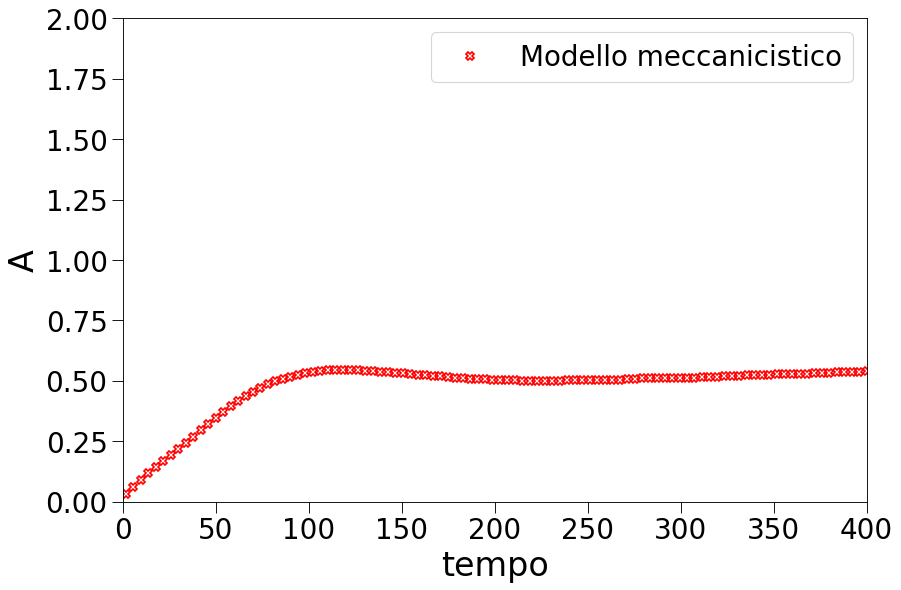

In [38]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('A', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, A, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')




ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [39]:
Pa=A/(1+A)

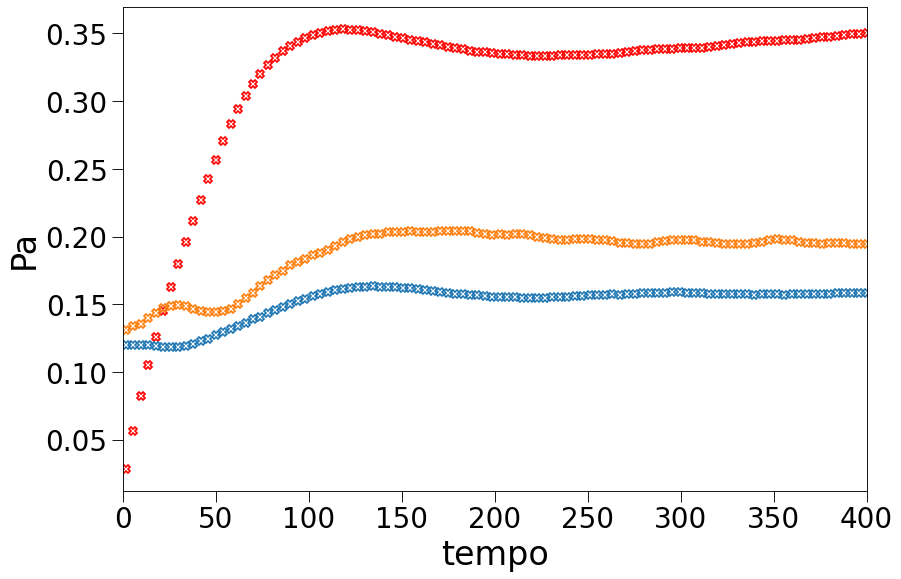

In [40]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('Pa', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
#ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, Pa, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, np.array(bin_mean_new[bin_mean_new.time>0].phi_r),marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, 10*np.array(bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter),marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')



#ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

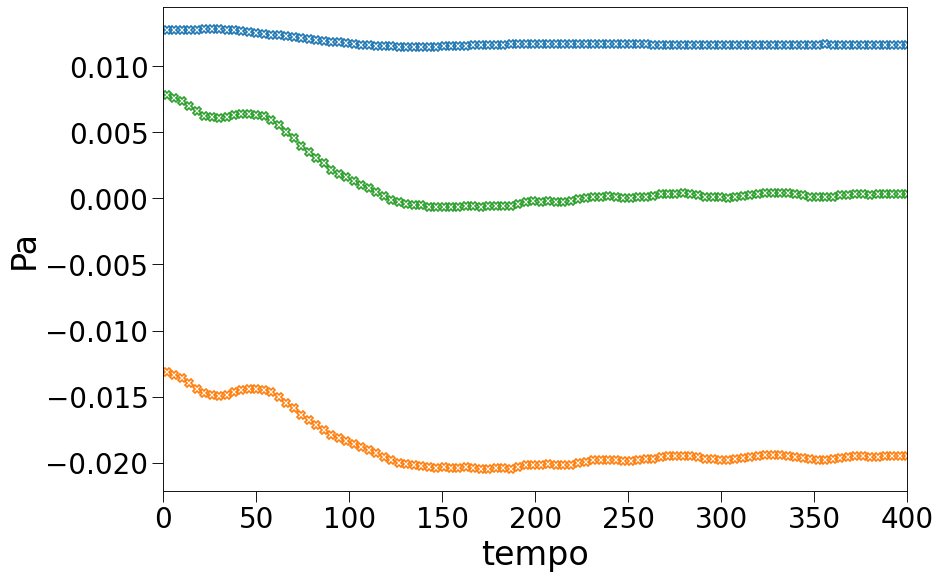

In [41]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('Pa', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
#ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
#ax1.plot(bin_mean_new[bin_mean_new.time>0].time, Pa, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, k*(0.55-np.array(bin_mean_new[bin_mean_new.time>0].phi_r)),marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, -np.array(bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter),marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, (k*(0.55-np.array(bin_mean_new[bin_mean_new.time>0].phi_r))-np.array(bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter))+J0,marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')



#ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

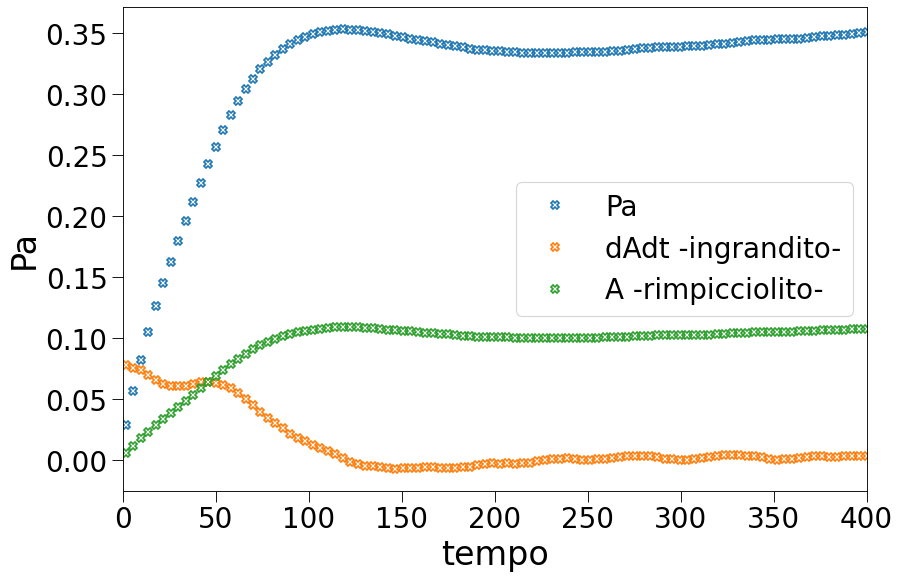

In [42]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('Pa', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
#ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
#ax1.plot(bin_mean_new[bin_mean_new.time>0].time, Pa, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, Pa,marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Pa')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, 10*((k*(0.55-np.array(bin_mean_new[bin_mean_new.time>0].phi_r))-np.array(bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter))+J0),
         marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'dAdt -ingrandito-')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, 0.2*A,marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'A -rimpicciolito-')



ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [ ]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('Pa', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
#ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, np.array(bin_mean_new[bin_mean_new.time>0].phi_r), 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')




#ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [ ]:
bin_mean_new

In [ ]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('Pa', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)
#ax1.set_ylim(0,2)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
#ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new[bin_mean_new.time>0].time, Pa*, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0)#, label= 'Modello meccanicistico')




#ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [ ]:
def ammino_ode(y,t):
    dAdt=(steady_p1longori_df.growth[0]/(0.55-steady_p1longori_df.phi_r[0]))*(
    0.55-np.array(bin_mean_new[bin_mean_new.time>0].phi_r))+J0-np.array(
    bin_mean_new[bin_mean_new.time>0].growth_rate_p5ter)
    return dAdt

In [ ]:
#A=scipy.integrate.odeint(ammino_ode,steady_p1longori_df.sigma[0],t_post)

In [ ]:
d_sigmadt=derivata_sg(bin_mean_new.time,bin_mean_new.sigma)

In [ ]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('$\sigma$', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)


ax1.tick_params(which='major', length=10, labelsize=25)


 
#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
ax1.plot(t_post, 0.13*dAdt, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(t_post, d_sigmadt[-100:], 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')




ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)

In [ ]:
sigma_prova=np.empty(len(dAdt))
#sigma_prova[0]=steady_p1longori_df.sigma[0]
delta_t=bin_mean_new.time[1]-bin_mean_new.time[0]
appoggio=steady_p1longori_df.sigma[0]
for i in range(len(dAdt))[1:]:
    sigma_prova[i]=appoggio+(np.array(dAdt)[i]*delta_t)
    appoggio=sigma_prova[i]

In [ ]:
sigma_prova

In [ ]:
len(range(len(dAdt))[1:])

In [ ]:
fig=plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

ax1= fig.add_subplot(1,1,1)


#ax1.set_xlabel("time", fontsize=25)
ax1.set_ylabel('$\sigma$', fontsize=30)
ax1.set_xlabel('tempo', fontsize=30)


#ax2.set_xlabel("time", fontsize=25)

ax1.set_xlim(0,400)


ax1.tick_params(which='major', length=10, labelsize=25)



#ax1.set_ylim(0.017,0.023)

#ax1.plot(t_fit, x, 'ro-',markersize=4, linewidth=0.7, label= 'data')
ax1.plot(t_post, 0.05*sigma_prova, 'g',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')
ax1.plot(bin_mean_new.time, bin_mean_new.sigma, 'r',marker='X',fillstyle='none',markeredgewidth=1.5,markersize=8, linewidth=0, label= 'Modello meccanicistico')




ax1.legend(fontsize=25)
#ax2.legend(fontsize=20)
#ax3.legend(fontsize=20)